In [12]:
### correlate the top sites
#alias to the same region
### look up for top sites
%matplotlib inline
import pandas as pd

In [54]:
rapMapDf=pd.read_pickle('rapmap.pickle')

In [101]:
topRapMapSiteDf=rapMapDf.tail(n=10000)
topRapMapSiteDf.fillna(0,inplace=True)

In [102]:
topRapMapSiteDf['Beta']=topRapMapSiteDf['methylated'].values/(topRapMapSiteDf['methylated'].values+topRapMapSiteDf['unmethylated'].values)

/cellar/users/btsui/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


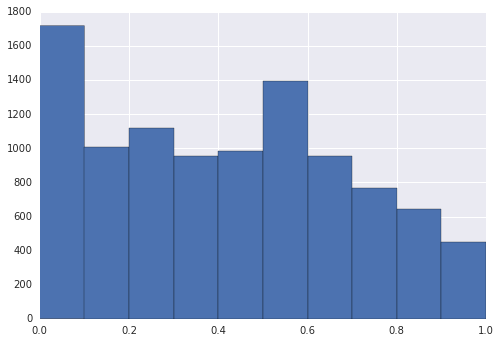

In [103]:
topRapMapSiteDf.Beta.hist()

In [85]:
roadMapDf=pd.read_csv('GSM432687_UCSD.IMR90.Bisulfite-Seq.combined.bed',sep='\t',header=None)

In [86]:
roadMapDf.columns=['Chr','Start','End','','Beta']

In [87]:
roadmap_chrDf=roadMapDf.set_index('Chr')

In [104]:
myDict={}
for i,rangeStr in enumerate(topRapMapSiteDf.index):
    Chr,RangeStr=rangeStr.split(':')
    Start,End=RangeStr.split('-')
    #m1=roadMapDf.Chr==Chr
    subChrDf=roadmap_chrDf.loc[Chr]
    m2=subChrDf.Start>=int(Start)
    m3=subChrDf.End<=int(End)
    subDf=subChrDf[(m2&m3)]
    medianBeta=subDf.Beta.median()
    myDict[rangeStr]=medianBeta
    if (i%1000)==0:
        print i

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [105]:
roadmapS=pd.Series(myDict)

In [106]:
myDf=pd.DataFrame({'rapmap':topRapMapSiteDf.Beta,'roadmap':roadmapS})

In [108]:
from scipy import stats

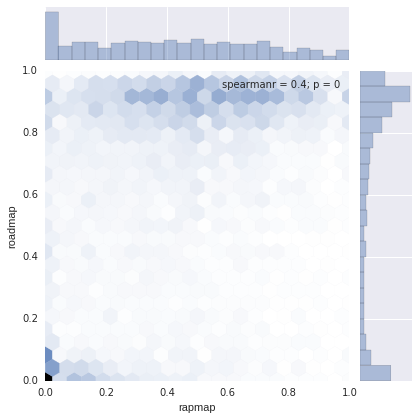

In [109]:
import seaborn as sns
sns.jointplot(data=myDf,x='rapmap',y='roadmap',kind='hex',stat_func=stats.spearmanr)